In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
data = pd.read_csv("train.csv")

In [23]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [25]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [26]:
print(f"Number of rows {data.shape[0]}")
print(f"Number of columns {data.shape[1]}")

Number of rows 891
Number of columns 12


In [27]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [28]:
data['Age'].fillna(data['Age'].median(), inplace=True)

C:\Users\auau\AppData\Local\Temp\ipykernel_29220\913469570.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)


In [29]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

C:\Users\auau\AppData\Local\Temp\ipykernel_29220\4247733614.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)


In [30]:
data.drop(columns=['Cabin'], inplace=True)

In [31]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [32]:
data.drop(columns=['PassengerId'], inplace=True)

In [33]:
data.drop(columns=['Ticket'], inplace=True)

In [34]:
data.duplicated().sum()


np.int64(0)

In [35]:
data["Age Category"] = data["Age"].apply(lambda age: 'Child' if age<=12\
else 'Youth' if age<=25 else 'Adult' if age<=45 else 'Elder')

In [36]:
data['Age Category'].head()

0    Youth
1    Adult
2    Adult
3    Adult
4    Adult
Name: Age Category, dtype: object

"Percentage of population according to Age category"

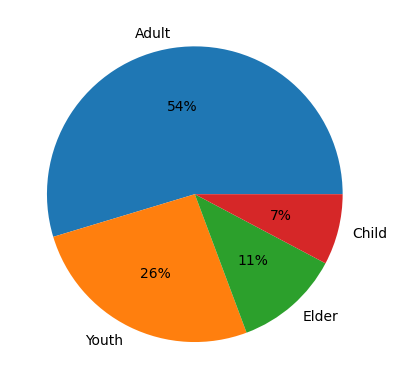

In [37]:
age_count = data['Age Category'].value_counts()
plt.pie(age_count, labels=age_count.index, autopct='%d%%')
plt.show()

"Percentage of population according to Gender"

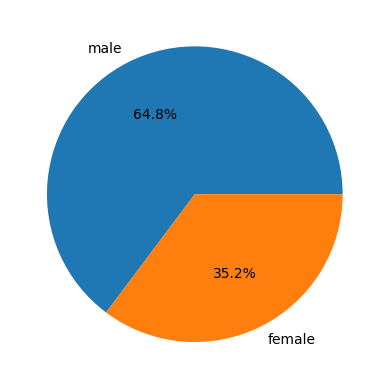

In [38]:
gender_count = data['Sex'].value_counts()
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%')
plt.show()

"Percentage of population according to Passenger class"

([<matplotlib.patches.Wedge at 0x1dca2e7c690>,
 [Text(-0.17571619097547903, 1.085874679799225, '3'),
  Text(-0.5160760536623383, -0.9714244730478574, '1'),
  Text(0.8765111790709129, -0.6646263258130227, '2')],
 [Text(-0.09584519507753402, 0.5922952798904862, '55%'),
  Text(-0.2814960292703663, -0.5298678943897404, '24%'),
  Text(0.47809700676595246, -0.3625234504434669, '20%')])

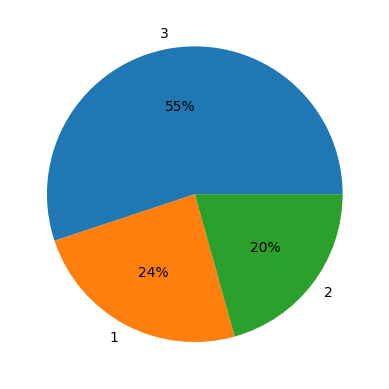

In [39]:
P_class = data['Pclass'].value_counts()
plt.pie(P_class, labels=P_class.index, autopct='%d%%')

In [40]:
data.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

"Females had a survival rate of ~74%, while males had only ~19%. Clearly gender played a big role in survival."

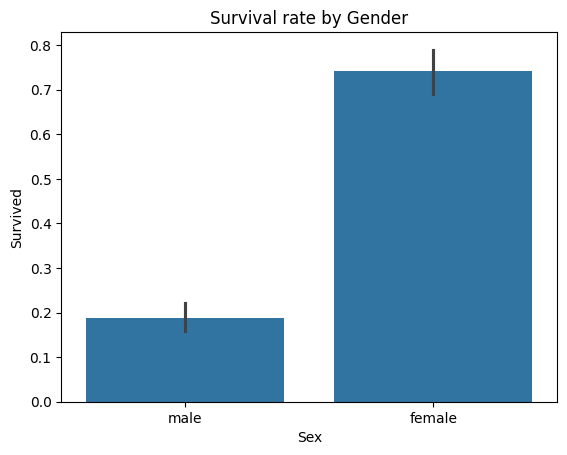

In [41]:
sns.barplot(data=data, x='Sex', y='Survived')
plt.title("Survival rate by Gender")
plt.show()

"Passenger Class also played important role in Survival"

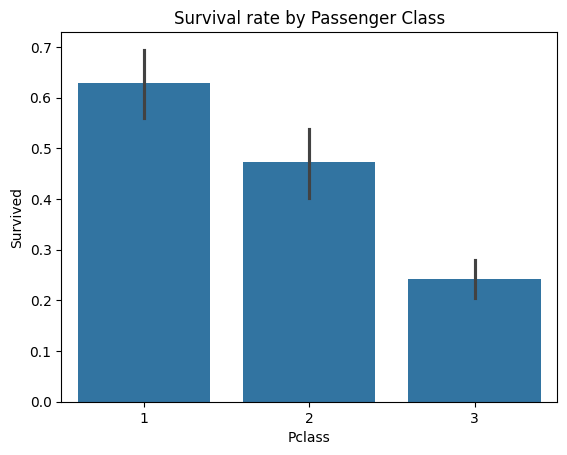

In [42]:
data.groupby('Pclass')['Survived'].mean()
sns.barplot(data=data, x='Pclass', y='Survived')
plt.title("Survival rate by Passenger Class")
plt.show()

"Children who has Age less than 12 years Survived the most, while Youth, Adult and Elder almost have same Survival rate"

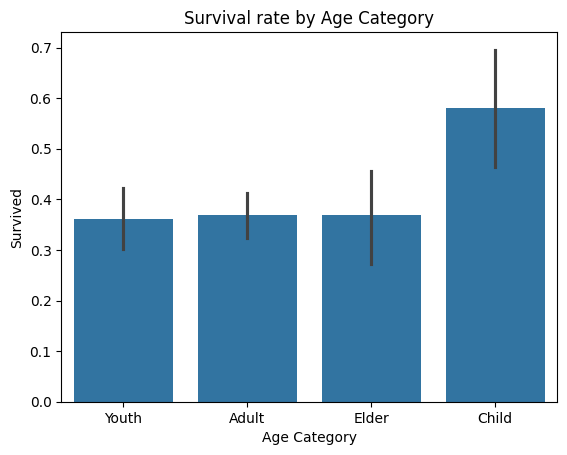

In [43]:
data.groupby('Age Category')['Survived'].mean()
sns.barplot(data=data, x='Age Category', y='Survived')
plt.title("Survival rate by Age Category")
plt.show()

In [44]:
data.groupby('Pclass')['Fare'].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

"Average Fare of Passenger class(1,2,3) in Titanic"

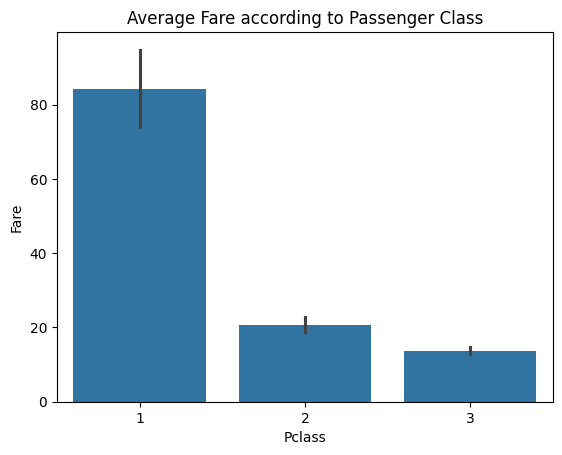

In [45]:
sns.barplot(data=data, x='Pclass', y='Fare')
plt.title("Average Fare according to Passenger Class")
plt.show()

In [46]:
Total_fare = data['Fare'].sum()
print(f"Total fare collected by titanic is ${round(Total_fare,2)}")

Total fare collected by titanic is $28693.95


In [47]:
Average_fare = Total_fare/(data.shape[0]-1)
print(f"Average fare paid by each person is ${round(Average_fare,2)}")

Average fare paid by each person is $32.24
